<a href="https://colab.research.google.com/github/JCorridon/Final-Project/blob/main/Group6_TrainingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual Computation
Scroll to bottom to see work

# Section 3.1 Training Data Preparation
95 features are considered too many features. The number of features must be reduced to increase
the model’s efficiency. Each team will produce a new training data set with features between 25 and 50.
There are unlimited ways and numbers to extract, select, drop, and engineer features.
1. The new train data must not be multicollinear.
2. Each feature must be in its own Gaussian.

## Step 1: Load and Inspect the Data

First, load the dataset to understand the data distribution and identify any issues such as missing values.

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('train_data.csv')

# Inspect the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     5807 non-null   int64  
 1   Bankrupt?                                                 5807 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  5807 non-null   float64
 3    ROA(A) before interest and % after tax                   5807 non-null   float64
 4    ROA(B) before interest and depreciation after tax        5807 non-null   float64
 5    Operating Gross Margin                                   5807 non-null   float64
 6    Realized Sales Gross Margin                              5807 non-null   float64
 7    Operating Profit Rate                                    5807 non-null   float64
 8    Pre-tax net Inter

## Step 2: Remove Multicollinear Features

Multicollinearity occurs when features are highly correlated with each other, which can lead to redundancy and impact model performance. To remove highly correlated features, you can use the correlation matrix and Variance Inflation Factor (VIF  pair.

### 2.1 Correlation Matrix

    Calculate the correlation matrix.
    Set a threshold for correlation (e.g., above 0.9) and drop one feature from each highly correlated pair.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = data.corr().abs()

# Set a threshold to filter highly correlated features
threshold = 0.9

# Find correlated features
corr_pairs = np.where(corr_matrix > threshold)
corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*corr_pairs) if x != y and x < y]

# Print highly correlated features
print("Highly correlated features:")
print(corr_pairs)

# Drop one feature from each pair
features_to_drop = list(set([pair[1] for pair in corr_pairs]))
data = data.drop(columns=features_to_drop)

print(f"Reduced features after dropping highly correlated features: {len(data.columns)}")


Highly correlated features:
[(' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax'), (' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax'), (' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax'), (' ROA(A) before interest and % after tax', ' Net Income to Total Assets'), (' ROA(B) before interest and depreciation after tax', ' Net Income to Total Assets'), (' Operating Gross Margin', ' Realized Sales Gross Margin'), (' Operating Gross Margin', ' Gross Profit to Sales'), (' Realized Sales Gross Margin', ' Gross Profit to Sales'), (' Operating Profit Rate', ' Pre-tax net Interest Rate'), (' Operating Profit Rate', ' Continuous interest rate (after tax)'), (' Pre-tax net Interest Rate', ' After-tax net Interest Rate'), (' Pre-tax net Interest Rate', ' Continuous interest rate (after tax)'), (' After-tax net Interest Rate', ' Continuous in

### 2.2 VIF Analysis

Variance Inflation Factor (VIF) can also be used to identify multicollinearity.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop features with zero or near-zero variance
features = data.drop(['Index', 'Bankrupt?'], axis=1)
zero_variance_features = [col for col in features.columns if features[col].std() == 0]
print(f"Zero variance features: {zero_variance_features}")

# Drop these features
features = features.drop(columns=zero_variance_features)

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iteratively drop features with high VIF
vif_threshold = 10
max_iterations = 100

for iteration in range(max_iterations):
    # Calculate VIF for each feature
    vif_data = calculate_vif(features)
    max_vif = vif_data['VIF'].max()

    if max_vif > vif_threshold:
        # Drop feature with highest VIF
        feature_to_drop = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
        print(f"Iteration {iteration + 1}: Dropping feature '{feature_to_drop}' with VIF: {max_vif:.2f}")
        features = features.drop(columns=[feature_to_drop])
    else:
        break

print(f"Final features after VIF reduction: {len(features.columns)}")
print("Remaining features:", list(features.columns))

# Update the original data to retain the reduced set of features
data = data[['Bankrupt?'] + list(features.columns)]


Zero variance features: [' Net Income Flag']
Iteration 1: Dropping feature ' Cash Flow Per Share' with VIF: 1431.99
Iteration 2: Dropping feature ' Net Income to Stockholder's Equity' with VIF: 23528.37
Iteration 3: Dropping feature ' Retained Earnings to Total Assets' with VIF: 5177.75
Iteration 4: Dropping feature ' Operating Profit Growth Rate' with VIF: 9949.34
Iteration 5: Dropping feature ' Operating Gross Margin' with VIF: 2446.28
Iteration 6: Dropping feature ' Interest Expense Ratio' with VIF: 7648.81
Iteration 7: Dropping feature ' Working Capital to Total Assets' with VIF: 710.73
Iteration 8: Dropping feature ' Current Liability to Assets' with VIF: 29.01
Iteration 9: Dropping feature ' Borrowing dependency' with VIF: 19.15
Final features after VIF reduction: 65
Remaining features: [' ROA(C) before interest and depreciation before interest', ' Operating Profit Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense

## Step 3: Ensure Gaussian Distribution

To ensure each feature follows a Gaussian distribution, you can perform transformations such as logarithmic transformation, Box-Cox transformation, or Yeo-Johnson transformation.

### 3.1 Check Gaussianity
e.
    Use statistical tests lior tanderson-darlingnov test to check normality.

 ROA(C) before interest and depreciation before interest is not normally distributed (statistic=72.1264)
 Operating Profit Rate is not normally distributed (statistic=2164.5018)
 Non-industry income and expenditure/revenue is not normally distributed (statistic=2113.1728)
 Operating Expense Rate is not normally distributed (statistic=988.4365)
 Research and development expense rate is not normally distributed (statistic=504.8074)
 Cash flow rate is not normally distributed (statistic=492.9958)
 Interest-bearing debt interest rate is not normally distributed (statistic=2133.6740)
 Tax rate (A) is not normally distributed (statistic=308.4234)
 Net Value Per Share (B) is not normally distributed (statistic=272.9113)
 Persistent EPS in the Last Four Seasons is not normally distributed (statistic=261.3850)
 Revenue Per Share (Yuan ¥) is not normally distributed (statistic=2242.3595)
 Operating Profit Per Share (Yuan ¥) is not normally distributed (statistic=353.1095)
 Realized Sales Gross P

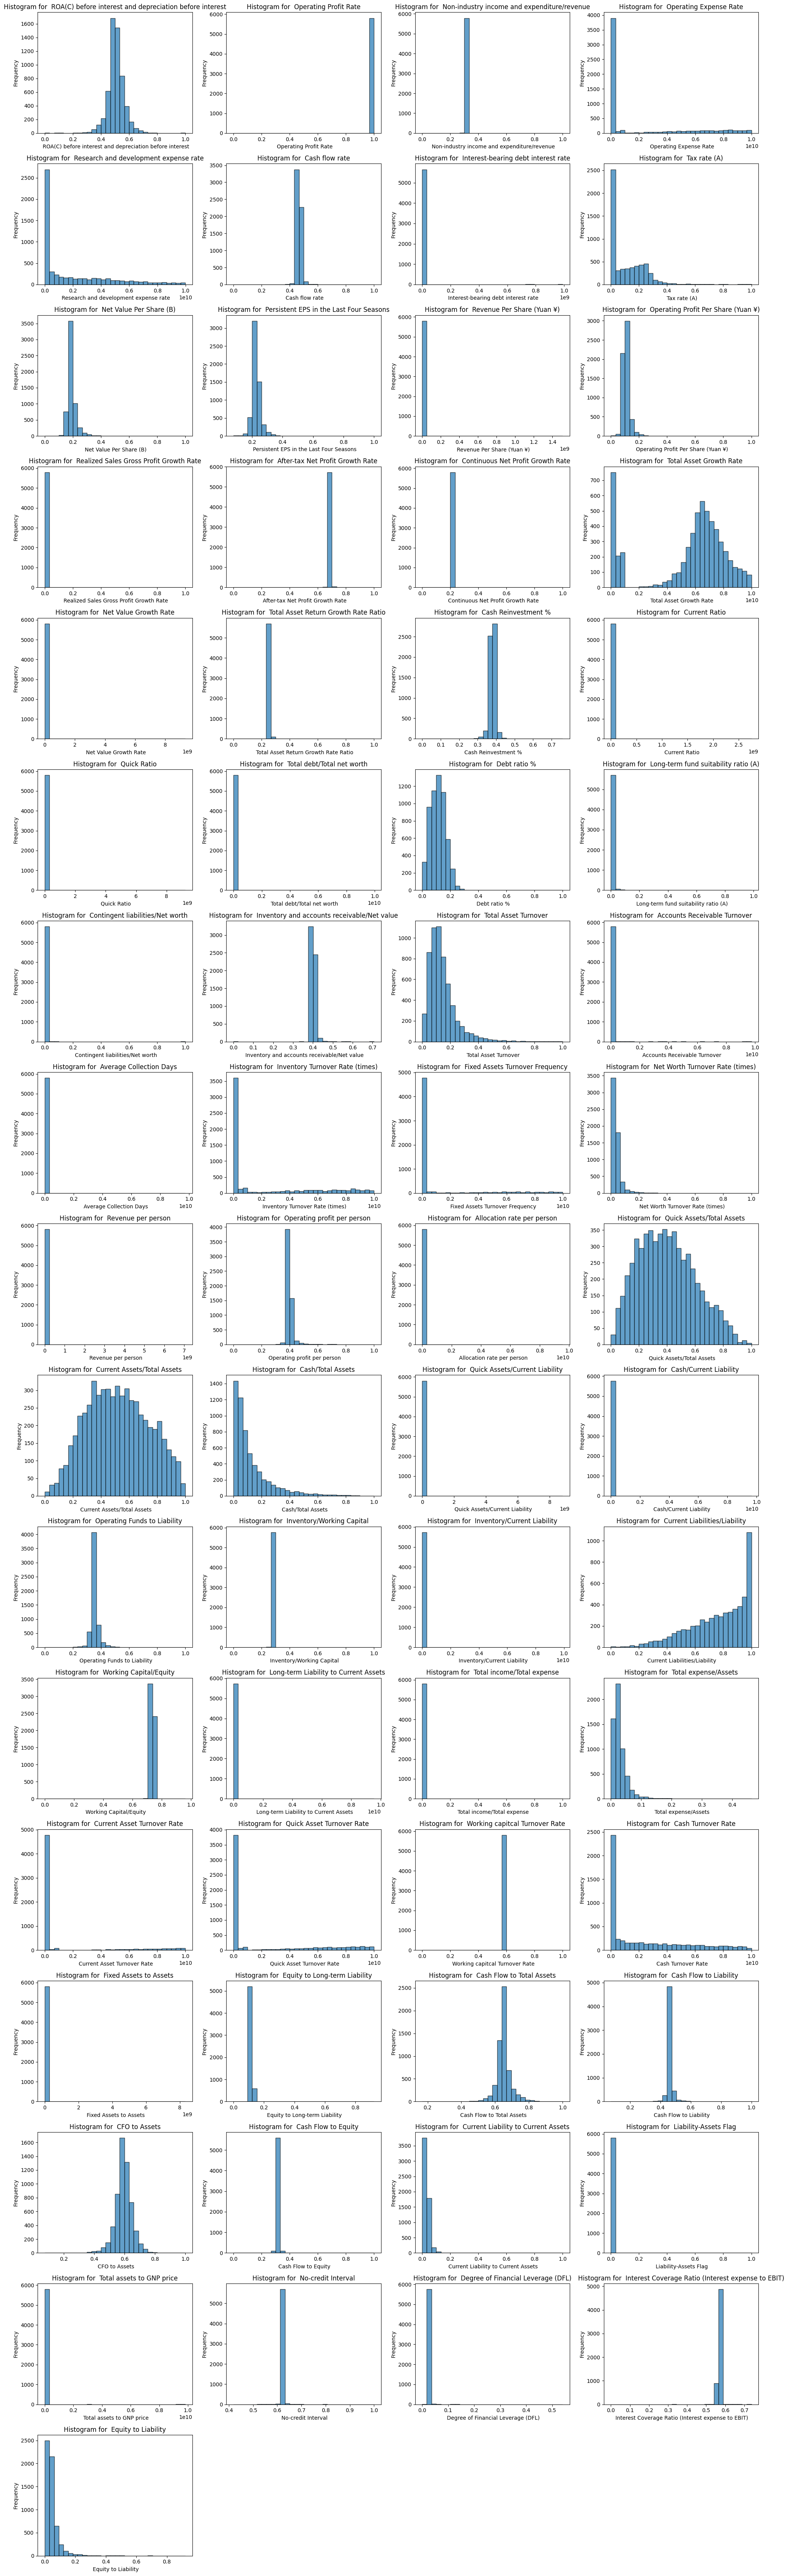

In [ ]:
from scipy.stats import anderson

# Check the normality of each feature using Anderson-Darling test
for col in features.columns:
    result = anderson(data[col], dist='norm')
    if result.statistic > result.critical_values[2]:  # 2 corresponds to a significance level of 5%
        print(f"{col} is not normally distributed (statistic={result.statistic:.4f})")

import matplotlib.pyplot as plt
import math

# Number of features excluding the target variable
n_features = len(features.columns)

# Determine the layout of the subplots (using 4 columns for better compactness)
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Create subplots for all features in a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot histograms for each feature (excluding the target variable)
for i, col in enumerate(features.columns):
    axes[i].hist(features[col], bins=30, edgecolor='k', alpha=0.7)
    axes[i].set_title(f"Histogram for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



### 3.2 Apply Transformations

    Apply a transformation to make non-Gaussian features more Gaussian-like.

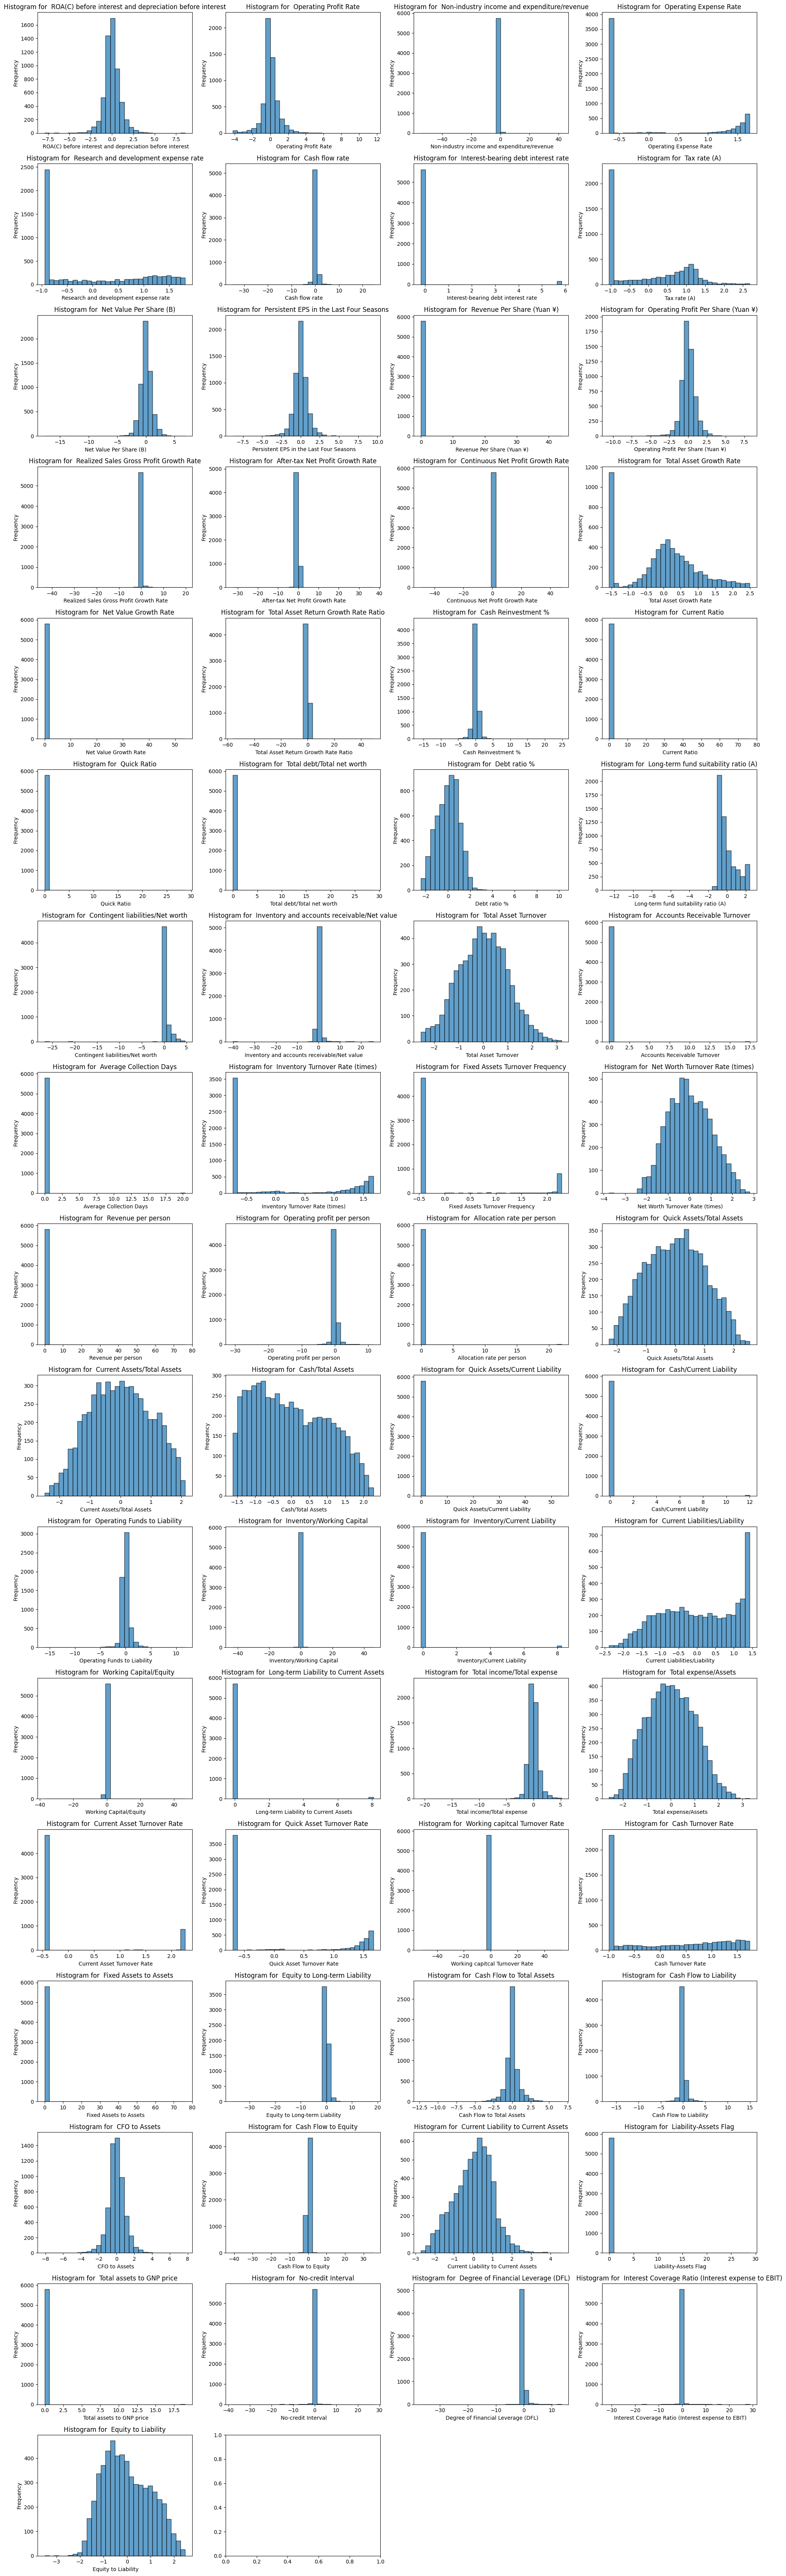

In [ ]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
import pandas as pd

# Check if 'Index' and 'Bankrupt?' exist in the DataFrame, and drop only if they exist
columns_to_drop = [col for col in ['Index', 'Bankrupt?'] if col in data.columns]
numeric_features = data.drop(columns=columns_to_drop, axis=1)

# Step 1: Standardize the numeric features
scaler = StandardScaler()
numeric_features_scaled = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)

# Step 2: Apply Yeo-Johnson transformation to the scaled features
pt = PowerTransformer(method='yeo-johnson')
data_transformed = pd.DataFrame(pt.fit_transform(numeric_features_scaled), columns=numeric_features.columns)

# Step 3: Add back the target column 'Bankrupt?'
if 'Bankrupt?' in data.columns:
    data_transformed['Bankrupt?'] = data['Bankrupt?']

# Verify Gaussianity again using histograms or Q-Q plots
import math

# Number of features excluding target
n_features = len(data_transformed.columns) - 1

# Determine the layout of the subplots
n_cols = 4
n_rows = math.ceil(n_features / n_cols)

# Create subplots for all features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(data_transformed.columns):
    if col != 'Bankrupt?':
        axes[i].hist(data_transformed[col], bins=30, edgecolor='k', alpha=0.7)
        axes[i].set_title(f"Histogram for {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Step 4: Feature Selection

Now that you've addressed multicollinearity and ensured Gaussian distribution, it's time to select the most relevant features. You can use:

### 4.1 Recursive Feature Elimination (RFE)

    Use RFE to select the most important features for prediction.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier as the estimator
X = data_transformed.drop(columns=['Bankrupt?'])
y = data_transformed['Bankrupt?']

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=30)
fit = rfe.fit(X, y)

# Get selected features
selected_features = X.columns[fit.support_]
X_selected = X[selected_features]
print(f"Selected features: {selected_features}")

Selected features: Index([' ROA(C) before interest and depreciation before interest',
       ' Non-industry income and expenditure/revenue', ' Cash flow rate',
       ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Continuous Net Profit Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Debt ratio %',
       ' Inventory and accounts receivable/Net value', ' Revenue per person',
       ' Operating profit per person', ' Quick Assets/Total Assets',
       ' Current Assets/Total Assets', ' Cash/Total Assets',
       ' Inventory/Working Capital', ' Current Liabilities/Liability',
       ' Working Capital/Equity', ' Total income/Total expense',
       ' Total expense/Assets', ' Working capitcal Turnover Rate',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' Current Liability to Current Assets

### 4.2 Principal Component Analysis (PCA)

    Use PCA to reduce the dimensionality while retaining as much variance as possible.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Apply PCA to reduce to 30 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance by the components: {pca.explained_variance_ratio_}")

Explained variance by the components: [0.18384927 0.10285454 0.08924425 0.06488847 0.05762554 0.04321313
 0.03746845 0.03599862 0.03457937 0.03385574 0.03301625 0.03268886
 0.03217765 0.03056041 0.02928715 0.02717455 0.02344628 0.01929112
 0.01786592 0.01348354 0.01251775 0.01110789 0.00892249 0.00721231
 0.00578353 0.00486303 0.00310496 0.00241149 0.00130534 0.00020208]


In [ ]:
# Combine by columns
combined_transformed_data = pd.concat([y,X_selected ], axis=1)
print(combined_transformed_data.head)

# Save transformed data into new CSV
combined_transformed_data.to_csv('reduced_3-1_data.csv', index=False)

<bound method NDFrame.head of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             0                                          -0.905695          
1             0                                           0.395922          
2             0                                           1.086432          
3             0                                          -0.371697          
4             0                                           0.070085          
...         ...                                                ...          
5802          0                                           0.022649          
5803          0                                           0.794024          
5804          0                                          -0.237315          
5805          0                                           0.124043          
5806          0                                           0.526062          

       Non-industry income and expenditure/re

The data for the training is stored in variables X and Y

# Section 3.2 Company Characterization
Considering the data size, understanding every company’s situation is quite difficult at a given time.
However, knowing the general situation will greatly help model training. The easiest approach is finding
the common characteristics between similar companies, and similar companies can easily be grouped by
using unsupervised learning clustering techniques.
1. Cluster the training data from 3.1 into k-many subgroups where k can be up to twice the team size
but not less than the team size. For example, if a team has three members, the cluster groups can
be between 3 and 6. The target must not be included.
2. Report the number of companies and the balance of bankrupted companies in each subgroup.
3. Identify unique or helpful characteristics in each subgroup. Use visualization techniques to present
identified characteristics.
4. Keep the cluster IDs. It will be used later in Section 3.3.

## Step 1: Apply Clustering (Updated for Team Size of 4)

In [ ]:
from sklearn.cluster import KMeans

data = pd.read_csv('reduced_3-1_data.csv')

# Seperate Data into X and Y
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

k = 4  # Adjust based on elbow method result
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
X_with_clusters = X.copy()
X_with_clusters['Cluster_ID'] = cluster_labels
data_transformed = data.copy()
data_transformed['Cluster_ID'] = cluster_labels

## Step 2: Analyze Clusters

In [ ]:
# Count the number of companies in each cluster
cluster_counts = data_transformed['Cluster_ID'].value_counts()
print("Number of companies in each cluster:")
print(cluster_counts)


Number of companies in each cluster:
Cluster_ID
2    1941
0    1492
3    1308
1    1066
Name: count, dtype: int64


In [ ]:
# Check the balance of bankrupted companies in each cluster
bankrupt_balance = data_transformed.groupby('Cluster_ID')['Bankrupt?'].value_counts().unstack()
print("\nBalance of bankrupted companies in each cluster:")
print(bankrupt_balance)



Balance of bankrupted companies in each cluster:
Bankrupt?        0     1
Cluster_ID              
0           1403.0  89.0
1           1052.0  14.0
2           1846.0  95.0
3           1308.0   NaN


## Step 3: Identify Unique Characteristics of Each Cluster

In [ ]:
# Get the cluster centers to understand characteristics of each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
   ROA(C) before interest and depreciation before interest  \
0                                          -0.337069         
1                                          -0.531318         
2                                          -0.152797         
3                                           1.042900         

   Non-industry income and expenditure/revenue  Cash flow rate  \
0                                    -0.017838       -0.318558   
1                                    -0.012521       -0.130685   
2                                    -0.000105       -0.058198   
3                                     0.030661        0.555515   

   Net Value Per Share (B)  Persistent EPS in the Last Four Seasons  \
0                -0.291814                                -0.209864   
1                -0.297811                                -0.446864   
2                -0.138083                                -0.223191   
3                 0.779542                               

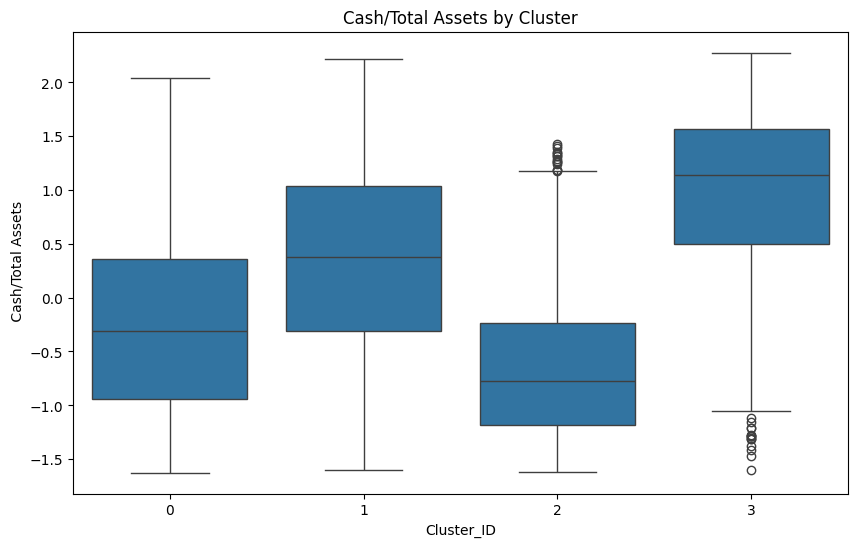

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to show distributions of 'Cash/Total Assets' across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster_ID', y=' Cash/Total Assets', data=data_transformed)
plt.title('Cash/Total Assets by Cluster')
plt.show()


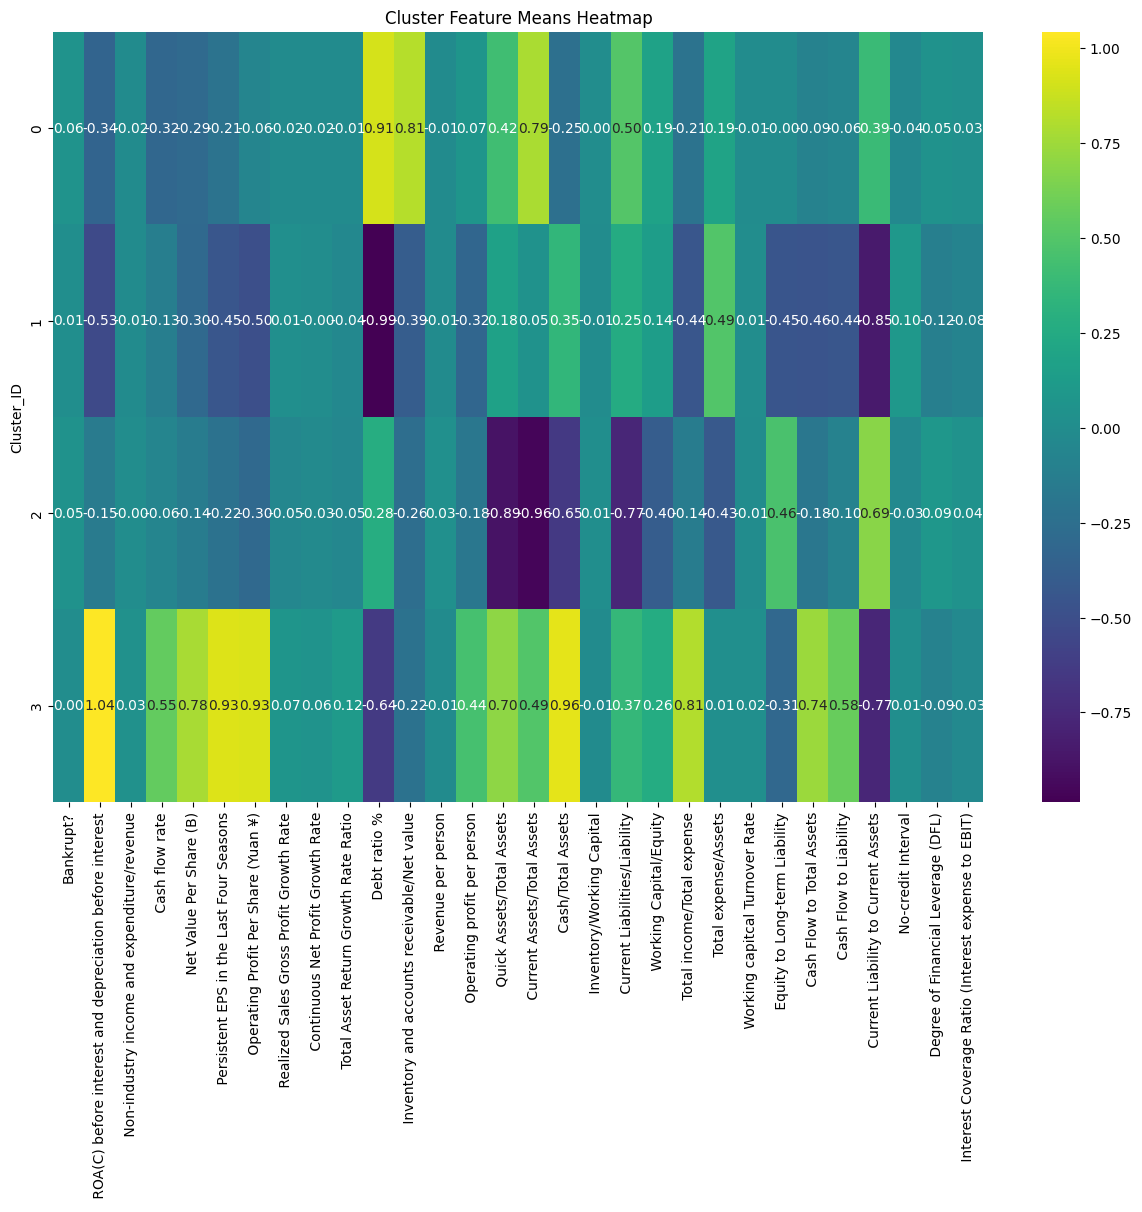

In [ ]:
# Group data by Cluster_ID to find the average values of features
cluster_summary = data_transformed.groupby('Cluster_ID').mean()

# Plot heatmap to visualize average feature values for each cluster
plt.figure(figsize=(15, 10))
sns.heatmap(cluster_summary.iloc[:, :-1], annot=True, cmap='viridis', fmt='.2f')
plt.title('Cluster Feature Means Heatmap')
plt.show()


## Step 5: Retain Cluster IDs

In [ ]:
data_transformed.to_csv('clustered_training_data.csv', index=False)


#3.3 Building Training Models

## Step 3.3.1
Build a classification model that predicts a subgroup a company will likely belong to using any
supervised learning algorithm. The prediction’s accuracy should be high, and it is okay to overfit.
Identify the features that play important roles in this prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
#First we divide the data into sub groups
model_data = data_transformed.copy() #I am doing this to make sure that the models do not interfere with future code, and will store the results in newer variables
model_data_shuffled = model_data.sample(frac = 1, random_state = 42)
target_A1, target_A2, target_A3, target_A4 = np.array_split(model_data_shuffled['Cluster_ID'], 4)
target_B1, target_B2, target_B3, target_B4 = np.array_split(model_data_shuffled['Bankrupt?'], 4)
model_data_shuffled = model_data_shuffled.drop(columns = ['Cluster_ID', 'Bankrupt?'])
sample_1, sample_2, sample_3, sample_4 = np.array_split(model_data_shuffled, 4)
#The Data has been divied into 4 separate sub groups

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

#This sample was done by Daniel Aranda
base_learners = [('RF', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('GB', GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('NB', GaussianNB())]
base_layer_2 = [
    ('RF', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('GB', GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42)),
    ('NB', GaussianNB())
]

layer_2 = StackingClassifier(estimators=base_learners, final_estimator = RidgeClassifier(random_state=42))
clfD = StackingClassifier(estimators = base_learners, final_estimator = layer_2, cv = 10)

#Sample 4
result = clfD.fit(sample_4, target_A4).score(sample_4, target_A4)
print(f'naive: {round(result, 3)}')
prediction = clfD.predict(sample_4)
cm = confusion_matrix(target_A4, prediction)
print(cm)
##############################
#Which features are most important for this estimation?
sample_4_copy = sample_4.copy()
pca = PCA(n_components=30)
X_pca = pca.fit_transform(sample_4_copy)
print(f"Explained variance by the components: {pca.explained_variance_ratio_}")

##################################################
#Grade the Subgroups
sample_4['Cluster_ID'] = prediction
sample_4['Bankrupt'] = target_B4
bankrupts4 = []
models4 = []
bankrupts4.append(sample_4['Bankrupt'][sample_4['Cluster_ID'] == 0])
bankrupts4.append(sample_4['Bankrupt'][sample_4['Cluster_ID'] == 1])
bankrupts4.append(sample_4['Bankrupt'][sample_4['Cluster_ID'] == 2])
bankrupts4.append(sample_4['Bankrupt'][sample_4['Cluster_ID'] == 3])
sample_4 = sample_4.drop(columns = 'Bankrupt')
for i in range(4):
  if(sample_4[sample_4['Cluster_ID'] == i]).size != 0:
    if(len(bankrupts4[i].unique())) > 1:
      models4.append(sample_4[sample_4['Cluster_ID'] == i])
      result = clfD.fit(sample_4[sample_4['Cluster_ID'] == i], bankrupts4[i]).score(sample_4[sample_4['Cluster_ID'] == i], bankrupts4[i])
      models4.append(clfD.fit(sample_4[sample_4['Cluster_ID'] == i], bankrupts4[i]))
      print(f'naive: {round(result,3)}')
      prediction = clfD.predict(sample_4[sample_4['Cluster_ID'] == i])
      cm = confusion_matrix(bankrupts4[i], prediction)
      print(cm)
    else:
      print('All companies in this subgroup are bankrupt or are not bankrupt')

naive: 0.995
[[372   1   1   0]
 [  0 268   1   0]
 [  3   0 480   0]
 [  0   0   1 325]]
Explained variance by the components: [1.77740697e-01 1.30745173e-01 1.02440406e-01 9.30153851e-02
 8.19298002e-02 6.72938111e-02 5.25039244e-02 3.89705514e-02
 3.82363854e-02 3.21647823e-02 2.90109524e-02 2.58052028e-02
 2.08490727e-02 1.74815650e-02 1.49159094e-02 1.18118495e-02
 1.05729305e-02 9.81021105e-03 8.36171298e-03 7.68452597e-03
 6.96771437e-03 6.11591935e-03 5.66348048e-03 3.45771008e-03
 2.20704253e-03 1.52759770e-03 1.35822747e-03 8.38058204e-04
 4.74305390e-04 4.50954068e-05]
naive: 0.941
[[353   0]
 [ 22   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

naive: 0.993
[[267   0]
 [  2   0]]
naive: 0.942
[[455   0]
 [ 28   0]]
All companies in this subgroup are bankrupt or are not bankrupt


## Analysis of Features
From the PCA results the most important features for my sub group are:
1. ROA(C) before interest and depreciation before interest:
2. Non-indsutry income and expenditure
3. Cash Flow Rate
4. Net Value Per Share

This is similar to the other individuals due to using the same features however the variance by the compents values are very different. A short explanation as to why is below:
1. ROA(C) Before Interest and Depreciation:
ROA measures how efficiently a company uses its assets to generate profits before accounting for interest and depreciation, highlighting core operational performance. A declining ROA can signal inefficiencies or profitability issues, which often precede financial distress.

2. Non-Industry Income and Expenditure:
This metric reflects income and expenses unrelated to the company’s core operations, which can introduce volatility and dependency on unpredictable revenue streams. Heavy reliance on non-industry income may indicate poor core business health or risky diversification strategies.

3. Cash Flow Rate:
The cash flow rate measures liquidity and a company's ability to manage short-term obligations and reinvest in operations. Consistent negative cash flows are a critical early indicator of insolvency and financial instability.

4. Net Value Per Share:
Net value per share reflects the equity health of the company and the value attributable to shareholders. Declining net value often signals eroding shareholder equity, financial losses, or excessive debt, which increase bankruptcy risk.